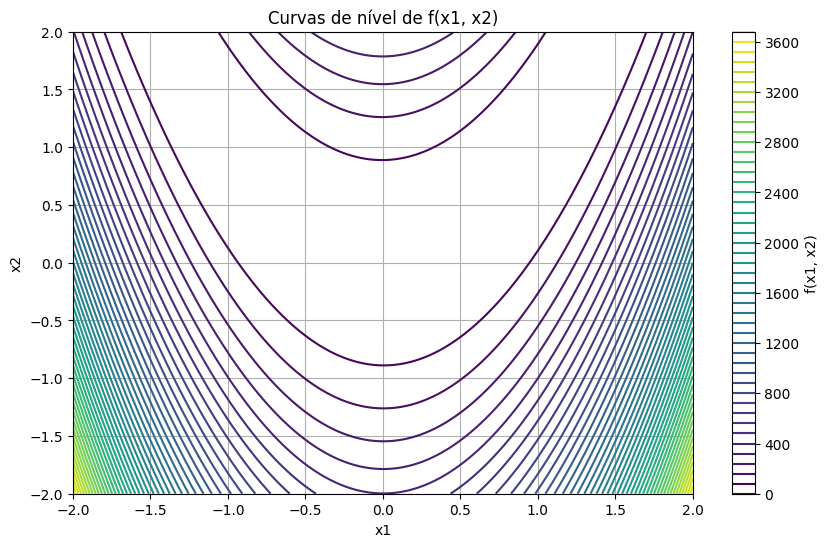

Resultado da otimização com BFGS:
Ponto ótimo: [1.         1.00000001]
Valor mínimo de f(x1, x2): 1.0796552370664605e-17

Resultado da otimização com o Método do Gradiente:
Ponto ótimo: [0.99999995 0.9999999 ]
Valor mínimo de f(x1, x2): 2.6859609523414305e-15


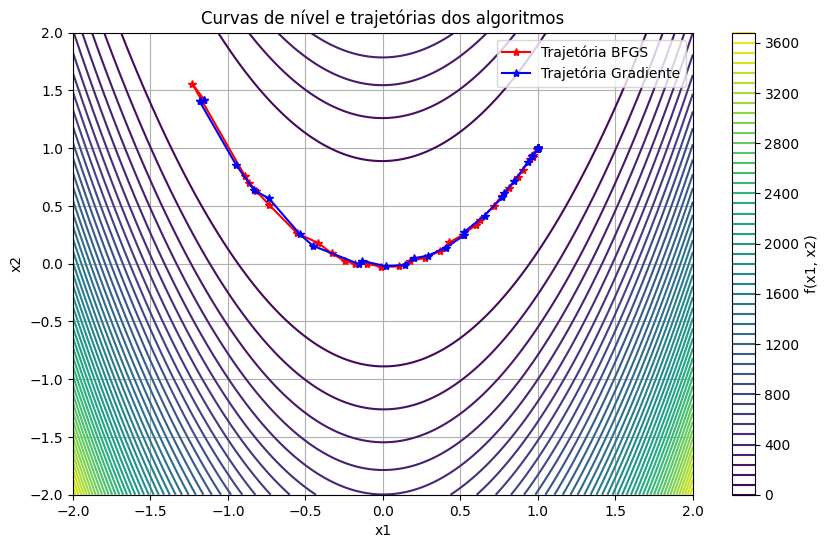

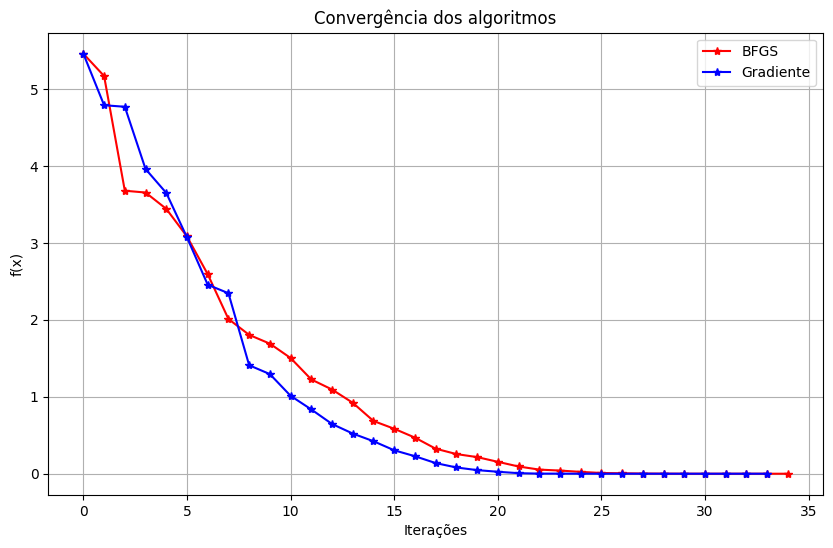

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Definição da função objetivo f(x1, x2)
def f(X):
    x1, x2 = X
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

# Gradiente da função objetivo (opcional para métodos baseados em gradiente)
def grad_f(X):
    x1, x2 = X
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Geração de malha para curvas de nível
x1 = np.linspace(-2, 2, 500)
x2 = np.linspace(-2, 2, 500)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
f_mesh = f([x1_mesh, x2_mesh])

# Plotar o gráfico de curva de nível
plt.figure(figsize=(10, 6))
contour = plt.contour(x1_mesh, x2_mesh, f_mesh, levels=50, cmap='viridis')
plt.colorbar(contour, label='f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível de f(x1, x2)')
plt.grid()
plt.show()

# Parte (b): Otimização com os dois métodos
x0 = [-1, 1.5]  # Ponto inicial

# Callback para salvar trajetórias
trajectory_bfgs = []
trajectory_gradient = []
function_values_bfgs = []
function_values_gradient = []

def callback_bfgs(x):
    trajectory_bfgs.append(x.tolist())
    function_values_bfgs.append(f(x))

def callback_gradient(x):
    trajectory_gradient.append(x.tolist())
    function_values_gradient.append(f(x))

# Minimização usando o método BFGS
result_bfgs = minimize(f,
                       x0=x0,
                       method='BFGS',
                       jac=grad_f,
                       callback=callback_bfgs,
                       tol=1e-6,
                       options={'maxiter': 100})

# Minimização usando o método do Gradiente
result_gradient = minimize(f,
                           x0=x0,
                           method='CG',
                           jac=grad_f,
                           callback=callback_gradient,
                           tol=1e-6,
                           options={'maxiter': 100})

# Resultados da otimização
print("Resultado da otimização com BFGS:")
print("Ponto ótimo:", result_bfgs.x)
print("Valor mínimo de f(x1, x2):", result_bfgs.fun)

print("\nResultado da otimização com o Método do Gradiente:")
print("Ponto ótimo:", result_gradient.x)
print("Valor mínimo de f(x1, x2):", result_gradient.fun)

# Plotar as trajetórias do algoritmo nas curvas de nível
plt.figure(figsize=(10, 6))
plt.contour(x1_mesh, x2_mesh, f_mesh, levels=50, cmap='viridis')
trajectory_bfgs = np.array(trajectory_bfgs)
trajectory_gradient = np.array(trajectory_gradient)
plt.plot(trajectory_bfgs[:, 0], trajectory_bfgs[:, 1], 'r*-', label='Trajetória BFGS')
plt.plot(trajectory_gradient[:, 0], trajectory_gradient[:, 1], 'b*-', label='Trajetória Gradiente')
plt.colorbar(label='f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível e trajetórias dos algoritmos')
plt.legend()
plt.grid()
plt.show()

# Plotar a convergência dos algoritmos
plt.figure(figsize=(10, 6))
plt.plot(function_values_bfgs, 'r*-', label='BFGS')
plt.plot(function_values_gradient, 'b*-', label='Gradiente')
plt.title('Convergência dos algoritmos')
plt.xlabel('Iterações')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


Resultado da otimização com BFGS:
Ponto ótimo: [1.         1.00000001]
Valor mínimo de f(x1, x2): 1.0796552370664605e-17
Número de Iterações: 35
Número de Avaliações da Função: 49

Resultado da otimização com o Método do Gradiente:
Ponto ótimo: [0.63968531 0.40814893]
Valor mínimo de f(x1, x2): 0.12993658448419237


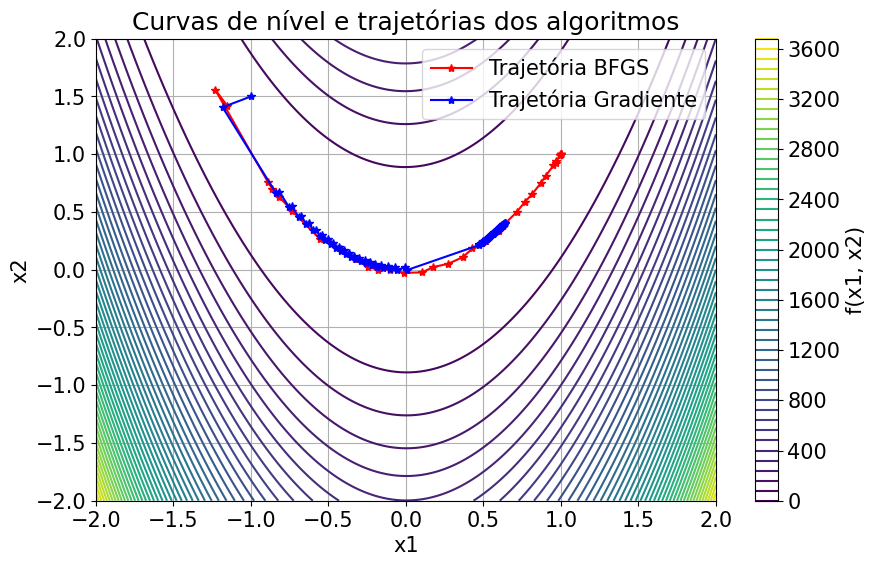

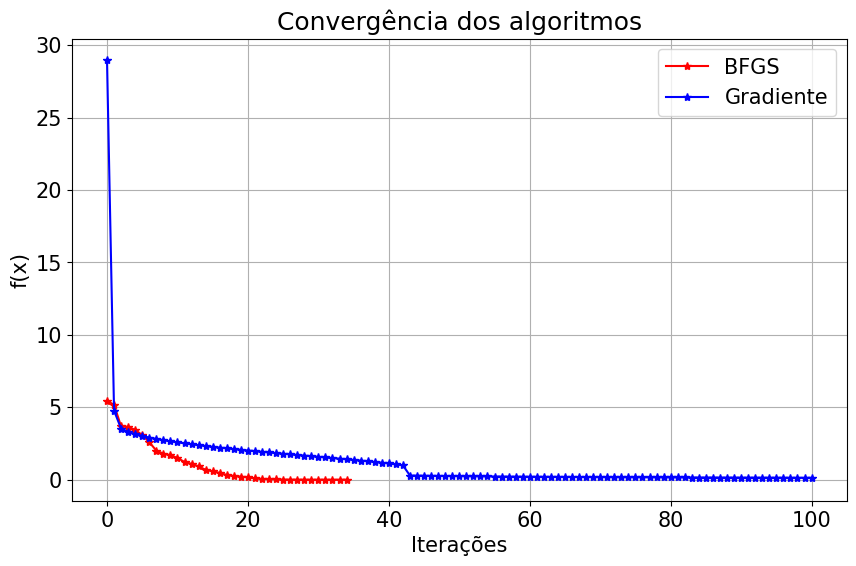

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from otimo import SecaoAurea

# Definição da função objetivo f(x1, x2)
def f(X):
    x1, x2 = X
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

# Gradiente exato da função objetivo
def grad_f(X):
    x1, x2 = X
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Geração de malha para curvas de nível
x1 = np.linspace(-2, 2, 500)
x2 = np.linspace(-2, 2, 500)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
f_mesh = f([x1_mesh, x2_mesh])

# Parte (b): Otimização com os dois métodos
x0 = np.array([-1, 1.5])  # Ponto inicial

# Trajetórias e valores da função para BFGS
trajectory_bfgs = []
function_values_bfgs = []

def callback_bfgs(x):
    trajectory_bfgs.append(np.copy(x))
    function_values_bfgs.append(f(x))

# Minimização usando o método BFGS
result_bfgs = minimize(f,
                       x0=x0,
                       method='BFGS',
                       jac=grad_f,
                       callback=callback_bfgs,
                       tol=1e-6,
                       options={'maxiter': 100})

# Método do Gradiente com seção áurea
trajectory_gradient = [np.copy(x0)]
function_values_gradient = [f(x0)]
x = np.copy(x0)

# Contadores para gradiente
gradient_iterations = 0
gradient_evaluations = 0

for i in range(100):  # Máximo de iterações
    gradient_iterations += 1

    # Calcula gradiente
    grad = grad_f(x)

    # Define a direção de descida
    d = -grad

    # Função unidimensional para otimização
    def theta(alpha):
        global gradient_evaluations
        gradient_evaluations += 1
        return f(x + alpha * d)

    # Determina o passo ótimo usando seção áurea
    alpha, i = SecaoAurea(precisao=1e-6, passo=1e-8).resolva(theta)

    # Atualiza x e calcula f(x)
    x = x + alpha * d
    fx = f(x)

    # Salva trajetória
    trajectory_gradient.append(np.copy(x))
    function_values_gradient.append(fx)

    # Critério de parada baseado na norma do gradiente
    if np.linalg.norm(grad) < 1e-6:
        break

trajectory_gradient = np.array(trajectory_gradient)

# Resultados da otimização
print("Resultado da otimização com BFGS:")
print("Ponto ótimo:", result_bfgs.x)
print("Valor mínimo de f(x1, x2):", result_bfgs.fun)
print("Número de Iterações:", result_bfgs.nit)
print("Número de Avaliações da Função:", result_bfgs.nfev)


print("\nResultado da otimização com o Método do Gradiente:")
print("Ponto ótimo:", x)
print("Valor mínimo de f(x1, x2):", fx)
print("Número de Iterações:", gradient_iterations)
print("Número de Avaliações da Função:", gradient_evaluations)

# Gráfico de trajetórias nas curvas de nível
plt.figure(figsize=(10, 6))
contour = plt.contour(x1_mesh, x2_mesh, f_mesh, levels=50, cmap='viridis')
plt.plot(np.array(trajectory_bfgs)[:, 0], np.array(trajectory_bfgs)[:, 1], 'r*-', label='Trajetória BFGS')
plt.plot(trajectory_gradient[:, 0], trajectory_gradient[:, 1], 'b*-', label='Trajetória Gradiente')
plt.colorbar(contour, label='f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de nível e trajetórias dos algoritmos')
plt.legend()
plt.grid()
plt.show()

# Gráfico de convergência
plt.figure(figsize=(10, 6))
plt.plot(function_values_bfgs, 'r*-', label='BFGS')
plt.plot(function_values_gradient, 'b*-', label='Gradiente')
plt.title('Convergência dos algoritmos')
plt.xlabel('Iterações')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()
